<a href="https://colab.research.google.com/github/thuBv-123/bai-tap-buoi-3/blob/main/Nh%E1%BA%ADn%20di%E1%BB%87n%20khu%C3%B4n%20m%E1%BA%B7t%20v%C3%A0%20c%E1%BA%A3m%20x%C3%BAc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import load_img,img_to_array,to_categorical
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,BatchNormalization,Dropout
from keras.models import Sequential, load_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_dir='/content/drive/MyDrive/FACE'
val_dir='/content/drive/MyDrive/FACE'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest',
    brightness_range=[0.8,1.2],
)

val_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical'
)
val_generator=val_datagen.flow_from_directory(
    val_dir,
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical'
)


model=Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])


model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=100,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)


Found 96 images belonging to 4 classes.
Found 96 images belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 5s/step - accuracy: 0.3034 - loss: 1.3962 - val_accuracy: 0.3854 - val_loss: 1.3560
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.3724 - loss: 1.3796 - val_accuracy: 0.3854 - val_loss: 1.3199
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.3620 - loss: 1.3479 - val_accuracy: 0.3958 - val_loss: 1.3022
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.3646 - loss: 1.3120 - val_accuracy: 0.3958 - val_loss: 1.2691
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.3854 - loss: 1.2774 - val_accuracy: 0.4271 - val_loss: 1.2125
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.4245 - loss: 1.2542 - val_accuracy: 0.5625 - val_loss: 1.2555
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.4688 - loss: 1.2079 - val_accuracy: 0.4271 - val_loss: 1.0960
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.3737 - loss: 1.2222 - val_accuracy: 0.5104 - val_loss: 1.2043
Epoch 9

In [4]:
from tensorflow.keras.callbacks import EarlyStopping

train_emotion = '/content/drive/MyDrive/EMOTON_TRAIN'
val_emotion = '/content/drive/MyDrive/EMOTION_VAL'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest',
    brightness_range=[0.8,1.2],
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator_emotion = train_datagen.flow_from_directory(
    train_emotion,
    target_size=(96,96),
    batch_size=32,
    class_mode='categorical'
)

val_generator_emotion = val_datagen.flow_from_directory(
    val_emotion,
    target_size=(96,96),
    batch_size=32,
    class_mode='categorical'
)


model_emotion = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_generator_emotion.num_classes, activation='softmax')
])

model_emotion.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model_emotion.fit(
    train_generator_emotion,
    steps_per_epoch=len(train_generator_emotion),
    epochs=100,
    validation_data=val_generator_emotion,
    validation_steps=len(val_generator_emotion),
    callbacks=[early_stop]
)

Found 79 images belonging to 7 classes.
Found 17 images belonging to 7 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 6s/step - accuracy: 0.1339 - loss: 8.4561 - val_accuracy: 0.1765 - val_loss: 1.9887
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 779ms/step - accuracy: 0.2242 - loss: 8.6210 - val_accuracy: 0.0588 - val_loss: 1.9984
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.2102 - loss: 7.3560 - val_accuracy: 0.0588 - val_loss: 1.9868
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 960ms/step - accuracy: 0.2714 - loss: 3.9028 - val_accuracy: 0.1765 - val_loss: 1.9195
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 917ms/step - accuracy: 0.2417 - loss: 4.2050 - val_accuracy: 0.1176 - val_loss: 1.9298
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 919ms/step - accuracy: 0.3130 - loss: 3.0130 - val_accuracy: 0.1176 - val_loss: 1.9946
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.2797 - loss: 3.4084 - val_accuracy: 0.1176 - val_loss: 2.1725
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 881ms/step - accuracy: 0.3055 - loss: 3.0994 - val_accuracy: 0.0588 - val_los

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Text(0.5, 1.0, 'Đây là LE THI XUAN MAI và đang cảm thấy happy')

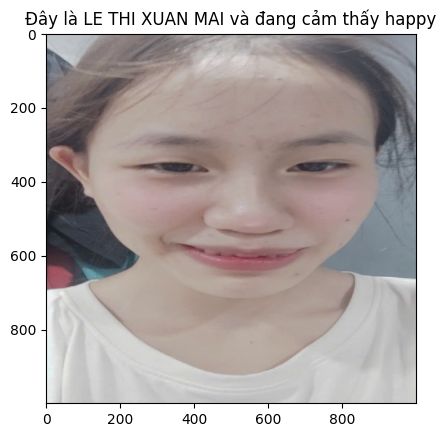

In [9]:
img = load_img('/content/z6518153007405_f4a94e04357a257d545dc7b67e36014c.jpg', target_size=(1000, 1000))
plt.imshow(img),

img = img.resize((96, 96))
img_array = img_to_array(img) / 255.0
img_array = img_array.reshape(1, 96, 96, 3)

prediction_emotion = model_emotion.predict(img_array)
class_names = list(train_generator_emotion.class_indices.keys())
predicted_class_emotion = class_names[np.argmax(prediction_emotion)]

img_face = img.resize((64, 64))
img_array_face = img_to_array(img_face) / 255.0
img_array_face = img_array_face.reshape(1, 64, 64, 3)
prediction = model.predict(img_array_face)
class_names_face = list(train_generator.class_indices.keys())
predicted_class_face = class_names_face[np.argmax(prediction)]


plt.title(f'Đây là {predicted_class_face} và đang cảm thấy {predicted_class_emotion}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Text(0.5, 1.0, 'Đây là QUACH HUE MY và đang cảm thấy angry')

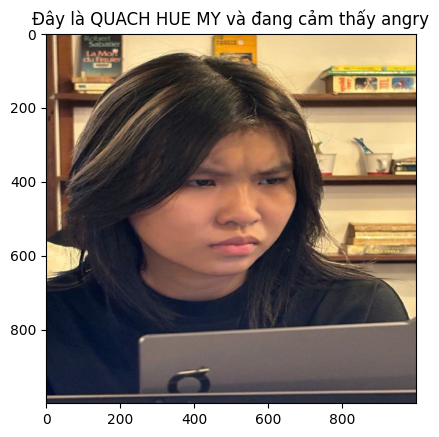

In [10]:
img = load_img('/content/1.jpg', target_size=(1000, 1000))
plt.imshow(img),

img = img.resize((96, 96))
img_array = img_to_array(img) / 255.0
img_array = img_array.reshape(1, 96, 96, 3)

prediction_emotion = model_emotion.predict(img_array)
class_names = list(train_generator_emotion.class_indices.keys())
predicted_class_emotion = class_names[np.argmax(prediction_emotion)]

img_face = img.resize((64, 64))
img_array_face = img_to_array(img_face) / 255.0
img_array_face = img_array_face.reshape(1, 64, 64, 3)
prediction = model.predict(img_array_face)
class_names_face = list(train_generator.class_indices.keys())
predicted_class_face = class_names_face[np.argmax(prediction)]


plt.title(f'Đây là {predicted_class_face} và đang cảm thấy {predicted_class_emotion}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Text(0.5, 1.0, 'Đây là BUI VU ANH THU và đang cảm thấy sad')

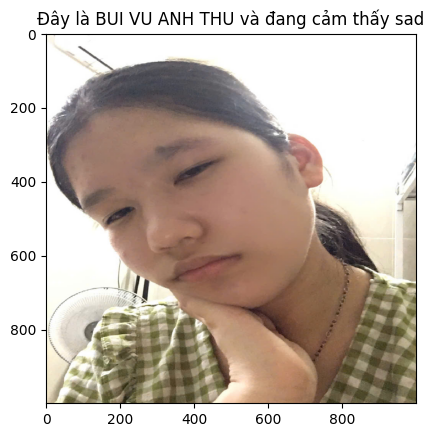

In [25]:
img = load_img('/content/z6519391555150_07edb2a32cacd65317ce3cb5b3b5b94f.jpg', target_size=(1000, 1000))
plt.imshow(img),

img = img.resize((96, 96))
img_array = img_to_array(img) / 255.0
img_array = img_array.reshape(1, 96, 96, 3)

prediction_emotion = model_emotion.predict(img_array)
class_names = list(train_generator_emotion.class_indices.keys())
predicted_class_emotion = class_names[np.argmax(prediction_emotion)]

img_face = img.resize((64, 64))
img_array_face = img_to_array(img_face) / 255.0
img_array_face = img_array_face.reshape(1, 64, 64, 3)
prediction = model.predict(img_array_face)
class_names_face = list(train_generator.class_indices.keys())
predicted_class_face = class_names_face[np.argmax(prediction)]


plt.title(f'Đây là {predicted_class_face} và đang cảm thấy {predicted_class_emotion}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Text(0.5, 1.0, 'Đây là VO THI ANH THU và đang cảm thấy happy')

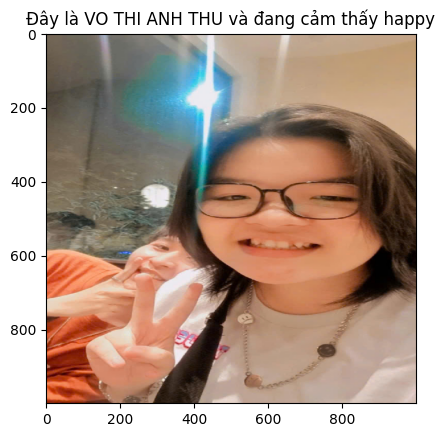

In [20]:
img = load_img('/content/vtat4.jpg', target_size=(1000, 1000))
plt.imshow(img),

img = img.resize((96, 96))
img_array = img_to_array(img) / 255.0
img_array = img_array.reshape(1, 96, 96, 3)

prediction_emotion = model_emotion.predict(img_array)
class_names = list(train_generator_emotion.class_indices.keys())
predicted_class_emotion = class_names[np.argmax(prediction_emotion)]

img_face = img.resize((64, 64))
img_array_face = img_to_array(img_face) / 255.0
img_array_face = img_array_face.reshape(1, 64, 64, 3)
prediction = model.predict(img_array_face)
class_names_face = list(train_generator.class_indices.keys())
predicted_class_face = class_names_face[np.argmax(prediction)]


plt.title(f'Đây là {predicted_class_face} và đang cảm thấy {predicted_class_emotion}')